# Function Transformer

In [5]:
import pandas as pd 
import numpy as np

In [1]:
import scipy.stats as stats # for ploting Q-Q Plot 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [6]:
df =pd.read_csv('dataset\\train.csv', usecols=['Age', 'Fare', 'Survived'])

In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df.fillna(df['Age'].mean(), inplace= True)

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [28]:
X = df.iloc[:,1:3]
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [62]:
Y =df.iloc[:,0:1]
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [29]:
X_train,X_test ,Y_train,Y_test =train_test_split(X,Y, test_size = .2,random_state =42)

C:\Users\dell\AppData\Local\Temp\ipykernel_3624\2680912167.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


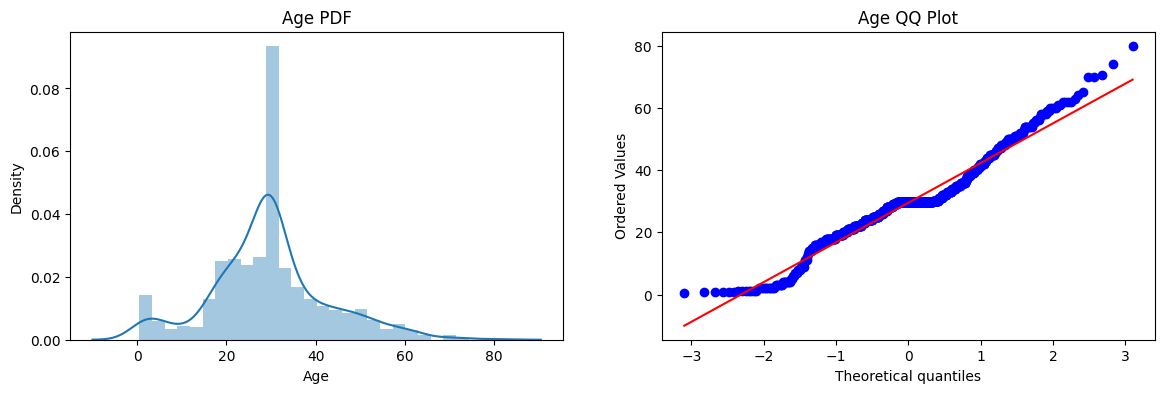

None


In [34]:
plt.figure(figsize=(14,4))
plt.subplot(121)

sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)

stats.probplot(X_train['Age'], dist= "norm",plot =plt)
plt.title('Age QQ Plot')


print(plt.show())


C:\Users\dell\AppData\Local\Temp\ipykernel_3624\41371494.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


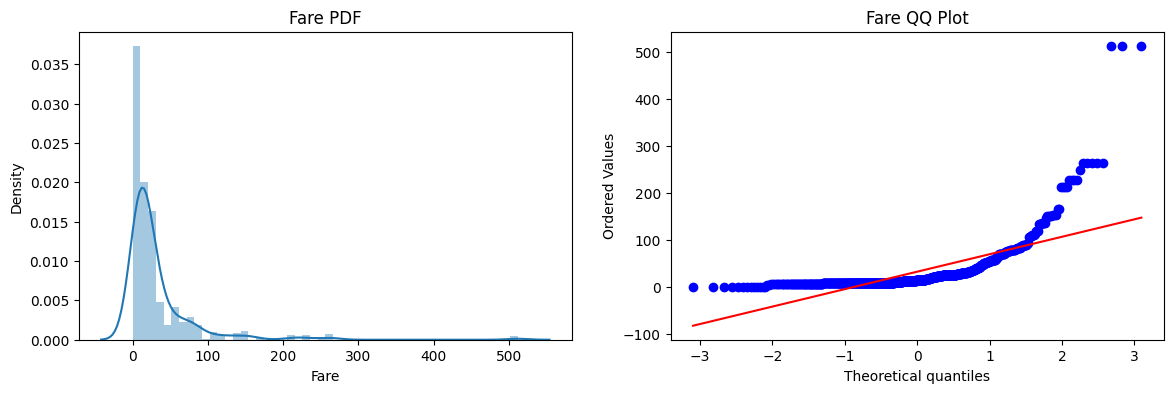

None


In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)

sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)

stats.probplot(X_train['Fare'], dist= "norm",plot =plt)
plt.title('Fare QQ Plot')


print(plt.show())


In [36]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()




In [37]:
lr.fit(X_train,Y_train)
clf.fit(X_train,Y_train)


lr_predict =lr.predict(X_test)
clf_predict = clf.predict(X_test)


print("Accuracy for LR" ,accuracy_score(Y_test,lr_predict))
print("Accuracy of DT" , accuracy_score(Y_test,clf_predict))

Accuracy for LR 0.6480446927374302
Accuracy of DT 0.659217877094972


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
trf = FunctionTransformer(func=np.log1p)

In [39]:
X_train_transformed =trf.fit_transform(X_train)
X_test_transformed =trf.transform(X_test)


In [ ]:

lr = LogisticRegression()
clf = DecisionTreeClassifier()

lr.fit(X_train_transformed,Y_train)
clf.fit(X_train_transformed,Y_train)


lr_predict =lr.predict(X_test_transformed)
clf_predict = clf.predict(X_test_transformed)


print("Accuracy for LR" ,accuracy_score(Y_test,lr_predict))
print("Accuracy of DT" , accuracy_score(Y_test,clf_predict))

Accuracy for LR 0.6815642458100558
Accuracy of DT 0.664804469273743


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
X_transfromed =trf.fit_transform(X)

lr = LogisticRegression()
clf = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(lr,X_transfromed,Y,scoring='accuracy',cv =10)))
print("DT",np.mean(cross_val_score(clf,X_transfromed,Y,scoring='accuracy',cv=10)))


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

LR 0.678027465667915
DT 0.6610986267166042


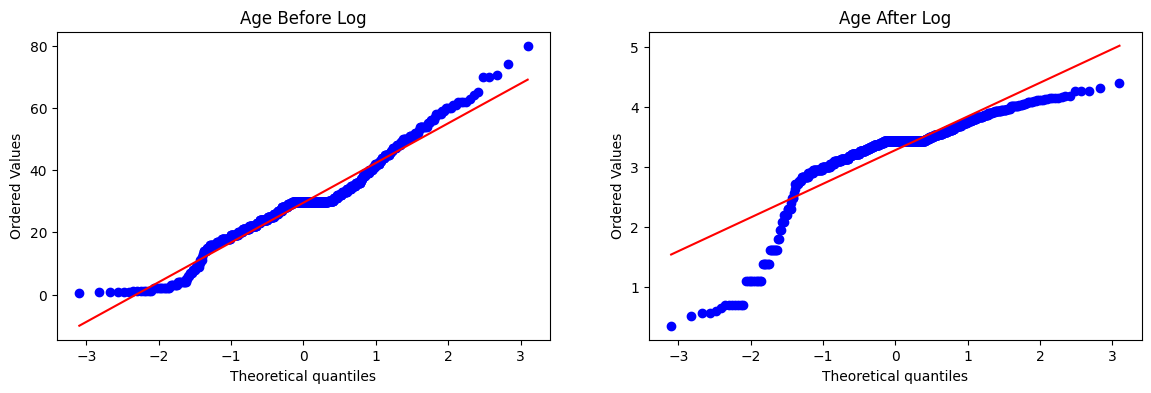

None


In [46]:
plt.figure(figsize=(14,4))
plt.subplot(121)

stats.probplot(X_train['Age'], dist= 'norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)

stats.probplot(X_train_transformed['Age'], dist= "norm",plot =plt)
plt.title('Age After Log')


print(plt.show())


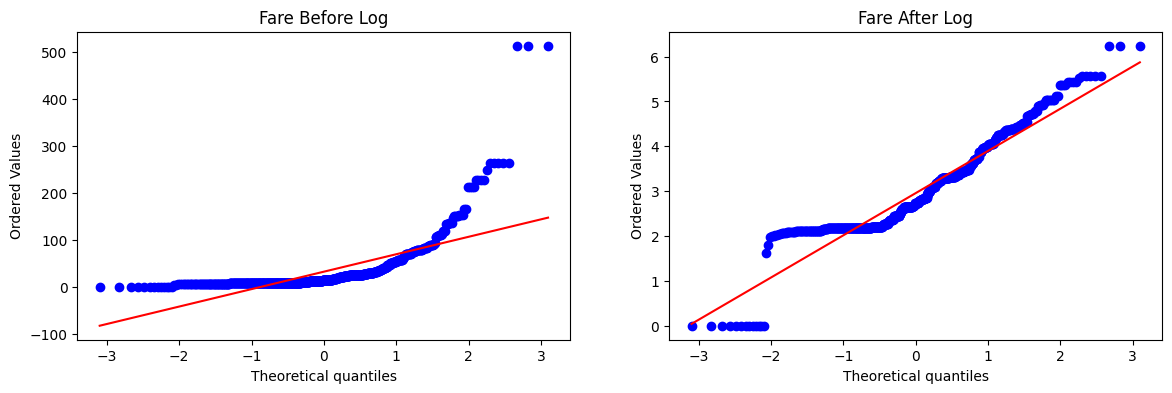

None


In [47]:
plt.figure(figsize=(14,4))
plt.subplot(121)

stats.probplot(X_train['Fare'], dist= 'norm',plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)

stats.probplot(X_train_transformed['Fare'], dist= "norm",plot =plt)
plt.title('Fare After Log')


print(plt.show())

In [52]:
trf2 = ColumnTransformer(transformers= [('log',FunctionTransformer(np.log1p),['Fare'])],remainder ='passthrough')


X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 =trf2.transform(X_test)

In [53]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

lr.fit(X_train_transformed2,Y_train)
clf.fit(X_train_transformed2,Y_train)


lr_predict =lr.predict(X_test_transformed2)
clf_predict = clf.predict(X_test_transformed2)


print("Accuracy for LR" ,accuracy_score(Y_test,lr_predict))
print("Accuracy of DT" , accuracy_score(Y_test,clf_predict))

Accuracy for LR 0.6703910614525139
Accuracy of DT 0.6703910614525139


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
X_transfromed2 =trf2.fit_transform(X)

lr = LogisticRegression()
clf = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(lr,X_transfromed2,Y,scoring='accuracy',cv =10)))
print("DT",np.mean(cross_val_score(clf,X_transfromed2,Y,scoring='accuracy',cv=10)))





LR 0.6712609238451936
DT 0.6577153558052433


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

# Appling other transform

In [83]:
def apply_transform(transform):
    X =df.iloc[:,1:3]
    Y =df.iloc[:,0]   # value change error occured if  Y =df.iloc[:,0] changed to Y =df.iloc[:,0:1] 
    
    trf =ColumnTransformer(transformers=[('Func' ,FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    lr =LogisticRegression()
    
    print("Accuracy_score of LR",np.mean(cross_val_score(lr,X_trans,Y ,scoring='accuracy',cv=10)))
    
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)

    stats.probplot(X['Fare'], dist= 'norm',plot=plt)
    plt.title('Fare Before Log')

    plt.subplot(122)

    stats.probplot(X_trans[:,0], dist= "norm",plot =plt) #  value change error occured if X_trans[:0] replaced by  X_trans['Fare ]
    plt.title('Fare After tansform')


    print(plt.show())
    


          

Accuracy_score of LR 0.6589013732833957


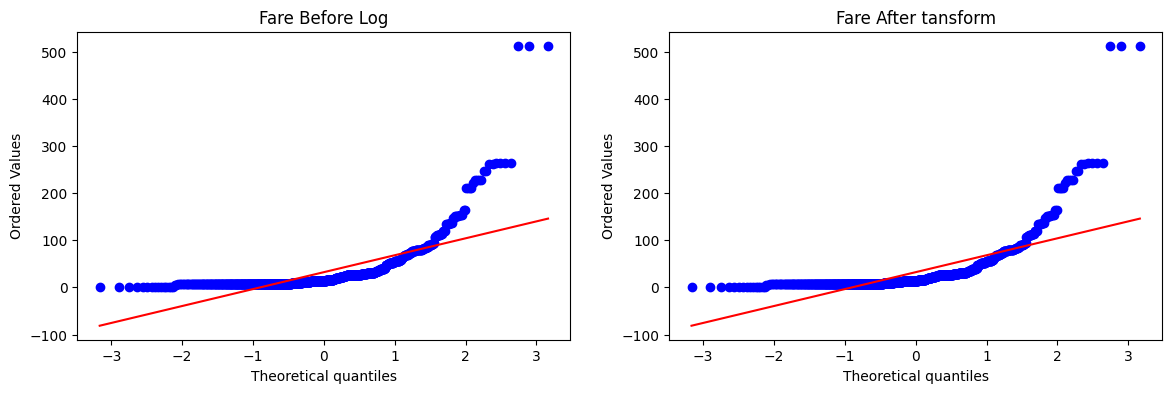

None


In [84]:
apply_transform(lambda x: x)

Accuracy_score of LR 0.6431335830212235


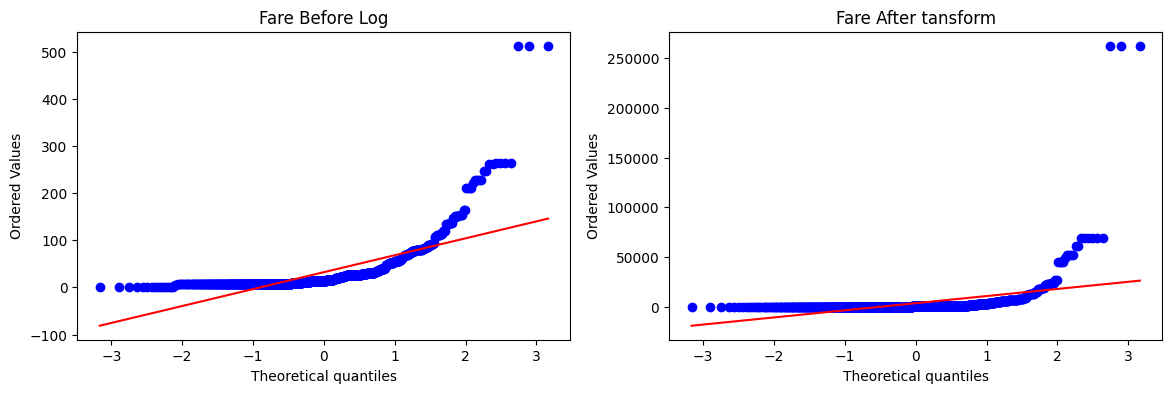

None


In [86]:
apply_transform(lambda x: x**2)

Accuracy_score of LR 0.6589013732833957


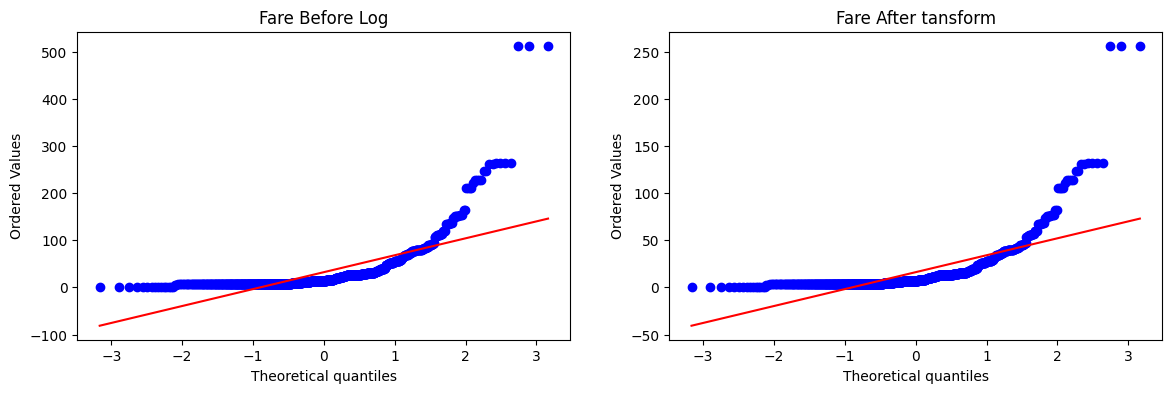

None


In [87]:
apply_transform(lambda x: x**1/2)

Accuracy_score of LR 0.61729088639201


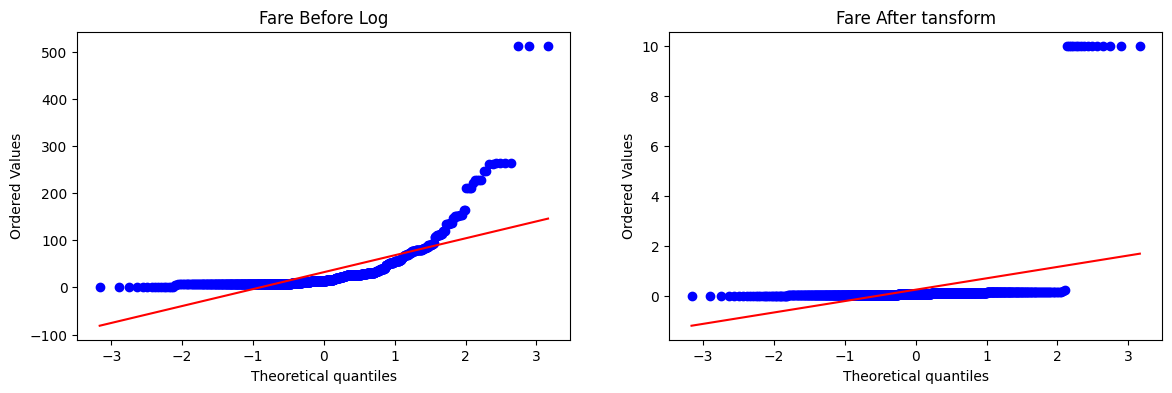

None


In [92]:
apply_transform(lambda x: 1/(x + 0.1))

Accuracy_score of LR 0.6195131086142323


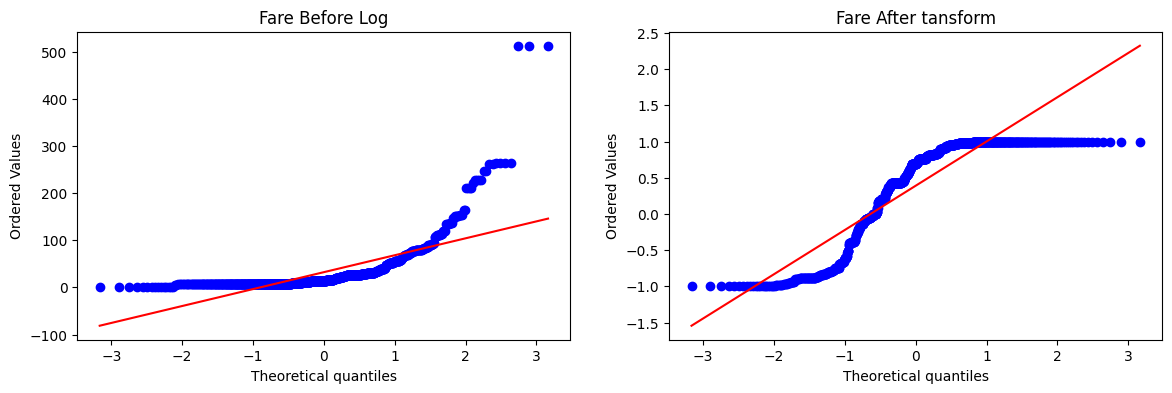

None


In [93]:
apply_transform(np.sin)